In [13]:
using HDF5
include("../viz/ba_eigenmodes.jl")

LoadError: ArgumentError: Package LinearAlgebra not found in current path:
- Run `import Pkg; Pkg.add("LinearAlgebra")` to install the LinearAlgebra package.


"Eigenvalue: 2.6337448571494972e-11"

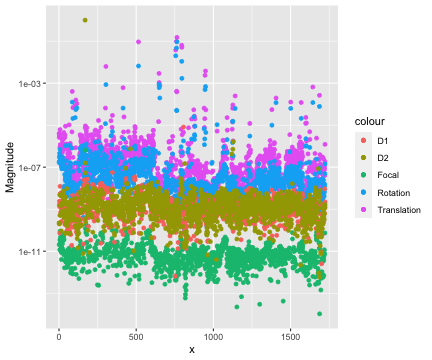

RObject{VecSxp}


┌ Warning: RCall.jl: Warning in self$trans$transform(x) : NaNs produced
│ Warning: Transformation introduced infinite values in continuous y-axis
│ Warning in self$trans$transform(x) : NaNs produced
│ Warning: Transformation introduced infinite values in continuous y-axis
│ Warning in self$trans$transform(x) : NaNs produced
│ Warning: Transformation introduced infinite values in continuous y-axis
│ Warning: Removed 412 rows containing missing values (geom_point).
│ Warning: Removed 376 rows containing missing values (geom_point).
│ Warning: Removed 202 rows containing missing values (geom_point).
└ @ RCall /Users/tristan/.julia/packages/RCall/g7dhB/src/io.jl:113


In [14]:
f = "../ba-problems/bal-ladybug-1723/"
prob = "10"
egindex = 0

egs = h5read("$f/eig_$(prob)_smallest.h5", "/")
poses = h5read("$f/robust_dump.h5", "$prob/poses")
scale = h5read("$f/robust_dump.h5", "$prob/scale")
ns = map(i -> h5read("$f/robust_dump.h5", "$prob/nullspace$i"), 1:7)
ba = readbal("$f/problem.bal")
# is this scaling correct?
eg = egs["eigenvector$egindex"] ./ scale

df = DataFrame(x=1:size(poses,2), trans=mapslices(norm, eg[1:3,:], dims=1)[:],
                                  rot=mapslices(norm, eg[4:6,:], dims=1)[:],
                                  intrin=mapslices(norm, eg[7:9,:], dims=1)[:],
                                  focal=eg[7,:],
                                  d1=eg[8,:],
                                  d2=eg[9,:])

display("Eigenvalue: $(egs["eigenvalues"][egindex+1])")
R"library(ggplot2)"
R"ggplot($df, aes(x=x)) + geom_point(aes(y=trans, color=\"Translation\")) +
                          geom_point(aes(y=rot, color=\"Rotation\")) +
                          geom_point(aes(y=focal, color=\"Focal\")) +
                          geom_point(aes(y=d1, color=\"D1\")) +
                          geom_point(aes(y=d2, color=\"D2\")) +
                          scale_y_log10() + ylab(\"Magnitude\")"

In [15]:
centers = poses2centers(poses)
centers_moved = poses2centers(poses .+ eg)

s = Scene()
scatter!(s, centers[1,:], centers[2,:], centers[3,:], transparency=true, show_axis=false)
draw_diff!(s, centers, centers_moved .- centers, 10.0)
setup_scene!(s, centers)
display(s)

GLMakie.Screen(...)

In [16]:
poses = h5read("../ba-problems/5_block_drift.problem/default_dump.h5", "1/poses")
scale = h5read("../ba-problems/5_block_drift.problem/default_dump.h5", "1/scale")
eg0 = h5read("../ba-problems/5_block_drift.problem/eig_1_smallest.h5", "eigenvector0") ./ scale
eg1 = h5read("../ba-problems/5_block_drift.problem/eig_1_smallest.h5", "eigenvector1") ./ scale
egl0 = h5read("../ba-problems/5_block_drift.problem/eig_1_largest.h5", "eigenvector0") ./ scale
egl1 = h5read("../ba-problems/5_block_drift.problem/eig_1_largest.h5", "eigenvector1") ./ scale
eg10 = h5read("../ba-problems/5_block_drift.problem/eig_10_smallest.h5", "eigenvector0") ./ scale
centers = poses2centers(poses)
centers_moved0 = poses2centers(poses .+ eg0)
centers_moved1 = poses2centers(poses .+ eg1)
centers_movedl0 = poses2centers(poses .+ egl0)
centers_movedl1 = poses2centers(poses .+ egl1)
centers_moved10 = poses2centers(poses .+ eg10)

default_res = (2000,2000)

s = Scene(resolution=default_res)
draw_diff!(s, centers, centers_moved0 .- centers, 0.05; arrowcolor=:red, linecolor=:red, linewidth=4, arrowsize=0.8)
setup_scene!(s, centers)
Makie.save("../../thesis/5_block_1_eig_smallest1.png", s)
s = Scene(resolution=default_res)
draw_diff!(s, centers, centers_moved1 .- centers, 0.05; arrowcolor=:blue, linecolor=:blue, linewidth=4, arrowsize=0.8)
setup_scene!(s, centers)
Makie.save("../../thesis/5_block_1_eig_smallest2.png", s)
s = Scene(resolution=default_res)
draw_diff!(s, centers, centers_moved10 .- centers, 0.05; arrowcolor=:red, linecolor=:red, linewidth=4, arrowsize=0.8)
setup_scene!(s, centers)
Makie.save("../../thesis/5_block_10_eig_smallest1.png", s)
s = Scene(resolution=default_res)
draw_diff!(s, centers, centers_movedl1 .- centers, 0.05; arrowcolor=:blue, linecolor=:blue, linewidth=4, arrowsize=0.8)
draw_diff!(s, centers, centers_movedl0 .- centers, 0.05; arrowcolor=:red, linecolor=:red, linewidth=4, arrowsize=0.8)
setup_scene!(s, centers)
Makie.save("../../thesis/5_block_1_eig_largest.png", s)
display(s)


GLMakie.Screen(...)

In [17]:
poses = h5read("../ba-problems/5_block_drift.problem/dump_gt.h5", "1/poses")
scale = h5read("../ba-problems/5_block_drift.problem/dump_gt.h5", "1/scale")
eg0 = h5read("../ba-problems/5_block_drift.problem/gt_eig_smallest.h5", "eigenvector9") ./ scale
eg1 = h5read("../ba-problems/5_block_drift.problem/gt_eig_smallest.h5", "eigenvector1") ./ scale
centers = poses2centers(poses)
centers_moved0 = poses2centers(poses .+ eg0)
centers_moved1 = poses2centers(poses .+ eg1)

s = Scene(resolution=default_res)
#scatter!(s, centers[1,:], centers[2,:], centers[3,:], transparency=true, show_axis=false)
draw_diff!(s, centers, centers_moved0 .- centers, 10.; arrowcolor=:red, linecolor=:red, linewidth=4, arrowsize=0.8)
#draw_diff!(s, centers, centers_moved1 .- centers, 100.0; arrowcolor=:blue, linecolor=:blue)
setup_scene!(s, centers)
Makie.save("../../thesis/5_block_gt_eig_smallest.png", s)
display(s)

HDF5-DIAG: Error detected in HDF5 (1.10.4) thread 0:
  #000: H5O.c line 120 in H5Oopen(): unable to open object
    major: Object header
    minor: Can't open object
  #001: H5Oint.c line 596 in H5O__open_name(): unable to open object
    major: Object header
    minor: Can't open object
  #002: H5Oint.c line 551 in H5O_open_name(): object not found
    major: Object header
    minor: Object not found
  #003: H5Gloc.c line 422 in H5G_loc_find(): can't find object
    major: Symbol table
    minor: Object not found
  #004: H5Gtraverse.c line 851 in H5G_traverse(): internal path traversal failed
    major: Symbol table
    minor: Object not found
  #005: H5Gtraverse.c line 627 in H5G__traverse_real(): traversal operator failed
    major: Symbol table
    minor: Callback failed
  #006: H5Gloc.c line 378 in H5G__loc_find_cb(): object 'eigenvector9' doesn't exist
    major: Symbol table
    minor: Object not found


ErrorException: Error opening object //eigenvector9